## Import des librairies

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
import math
plt.style.use('ggplot')

Lecture des données et ajout d'une colonne : Total

In [5]:
data = pd.read_parquet('est_hourly.parquet')
data

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN


In [6]:
data['Total'] = data.sum(axis=1)
data

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load,Total
Datetime,,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0,29309.0
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0,28236.0
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0,27692.0
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0,27596.0
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0,27888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN,127414.0
2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN,126632.0
2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN,124231.0


# Visualisation des données

## Time plots

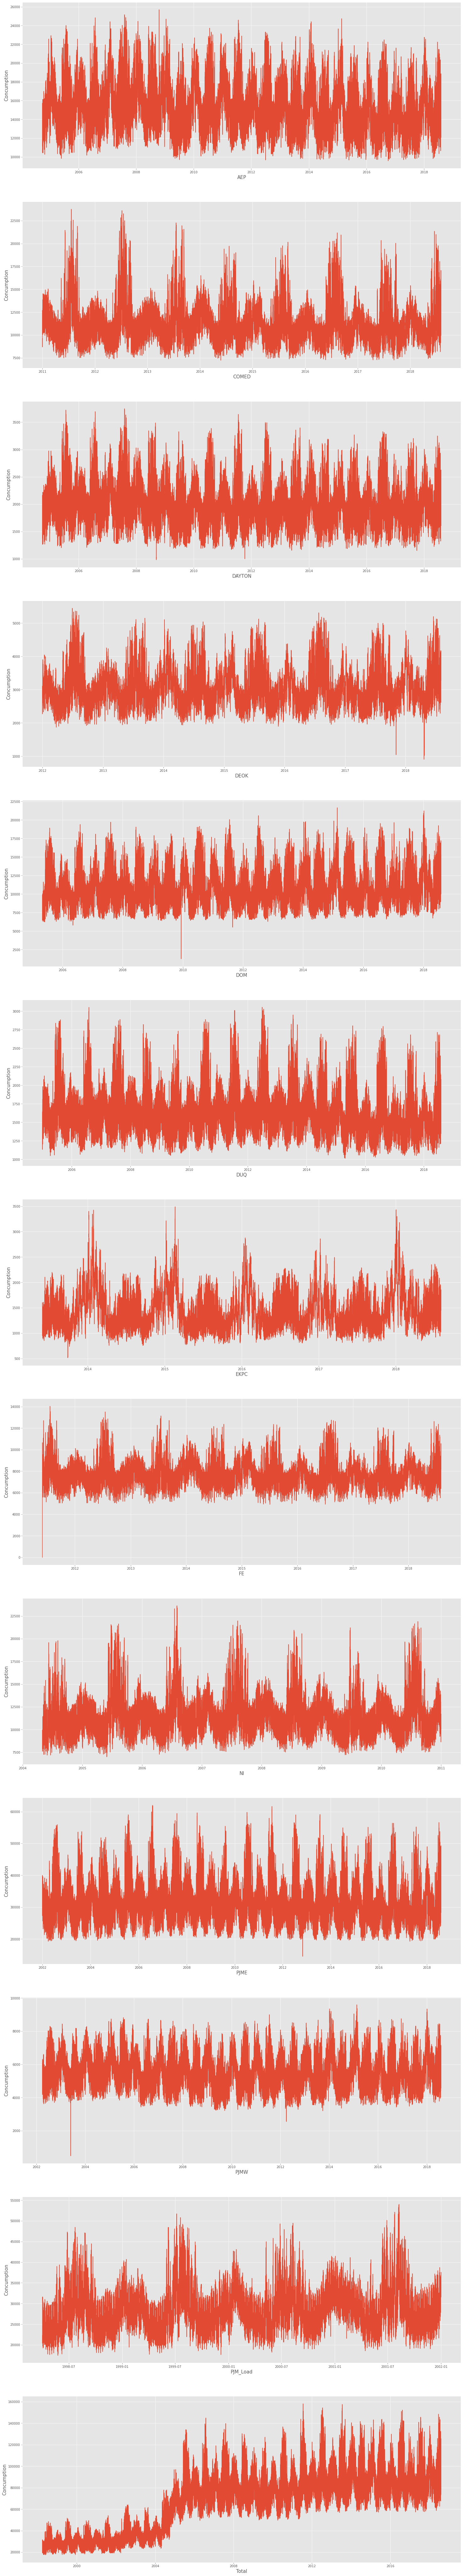

In [7]:
data.sort_index(inplace=True)
plt.figure(figsize = [25, 150])
for i,x in enumerate(data.columns[:13]):
    plt.subplot(13,1,i+1)
    plt.plot(data.index, data[x])
    plt.xlabel(x, fontsize=15)
    plt.ylabel('Concumption', fontsize=15)

### adding months, days, weeks, seasons and weekends

In [8]:
data['date'] = data.index.date 
data['year_day'] = data.index.dayofyear
data['hour'] = data.index.hour
data['week_day'] = data.index.dayofweek
data['week'] = data.index.isocalendar().week
data['month_day'] = data.index.day 
data['month'] = data.index.month
data['quarter'] = data.index.quarter
data['year'] = data.index.year
data = data[(data.year<2018) & (data.year>=2005)]

In [9]:
data = data[(data.year<2018) & (data.year>=2005)]

In [10]:
def getSeason(x):
    month = data.iloc[x,19]
    if (month > 11 or month <= 3):
       return "WINTER"
    elif (month == 4 or month == 5):
       return "SPRING"
    elif (month >=6 and month <= 9):
       return "SUMMER"
    else:
       return "Autumn"

def getweekend(x):
    month = data.iloc[x,16]
    if month > 4:
       return '1'
    else:
       return '0'

data['weekend'] = [getweekend(x) for x in range(0,data.shape[0])]
data['season'] = [getSeason(x) for x in range(0,data.shape[0])]

In [11]:
# Process Duplicated Values
ids = data.index
data[ids.isin(ids[ids.duplicated()])]

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,...,year_day,hour,week_day,week,month_day,month,quarter,year,weekend,season
Datetime,,,,,,,,,,,,,,,,,,,,,
2014-11-02 02:00:00,12994.0,8869.0,1623.0,2518.0,8555.0,1272.0,1554.0,6051.0,NaN,22935.0,...,306,2,6,44,2,11,4,2014,1,Autumn
2014-11-02 02:00:00,13190.0,9184.0,1634.0,2562.0,8562.0,1240.0,1566.0,6185.0,NaN,23755.0,...,306,2,6,44,2,11,4,2014,1,Autumn
2015-11-01 02:00:00,10785.0,8270.0,1324.0,2164.0,7392.0,1113.0,978.0,5653.0,NaN,21567.0,...,305,2,6,44,1,11,4,2015,1,Autumn
2015-11-01 02:00:00,10542.0,7923.0,1292.0,2257.0,7345.0,1138.0,944.0,5455.0,NaN,21171.0,...,305,2,6,44,1,11,4,2015,1,Autumn
2016-11-06 02:00:00,11008.0,8028.0,1364.0,2198.0,8145.0,1107.0,1028.0,5587.0,NaN,21692.0,...,311,2,6,44,6,11,4,2016,1,Autumn
2016-11-06 02:00:00,10964.0,7814.0,1334.0,2350.0,7924.0,1121.0,1042.0,5523.0,NaN,20795.0,...,311,2,6,44,6,11,4,2016,1,Autumn
2017-11-05 02:00:00,10596.0,8198.0,1449.0,2064.0,7677.0,1131.0,910.0,5573.0,NaN,21236.0,...,309,2,6,44,5,11,4,2017,1,Autumn
2017-11-05 02:00:00,10446.0,7878.0,1331.0,1044.0,7468.0,1105.0,900.0,5467.0,NaN,20666.0,...,309,2,6,44,5,11,4,2017,1,Autumn


In [12]:
data = data[~data.index.duplicated(keep='last')]

# Granularités

In [13]:
data_hours = data['Total']
data_days = data.groupby('date').sum()
data_days = data_days['Total']
data_weeks = data.groupby(['year','week']).sum()
data_weeks = data_weeks['Total']
data_months = data.groupby(['year','month']).sum()
data_months = data_months['Total']
data_months_mean = data.groupby(['year','month']).mean()
data_months_mean = data_months_mean['Total']
data_seasons = data.groupby(['year','season']).sum()
data_seasons = data_seasons['Total']

In [14]:
gran = [data_hours, data_days, data_weeks, data_months, data_seasons]
label = ['data_hours', 'data_days', 'data_weeks', 'data_months', 'data_seasons']

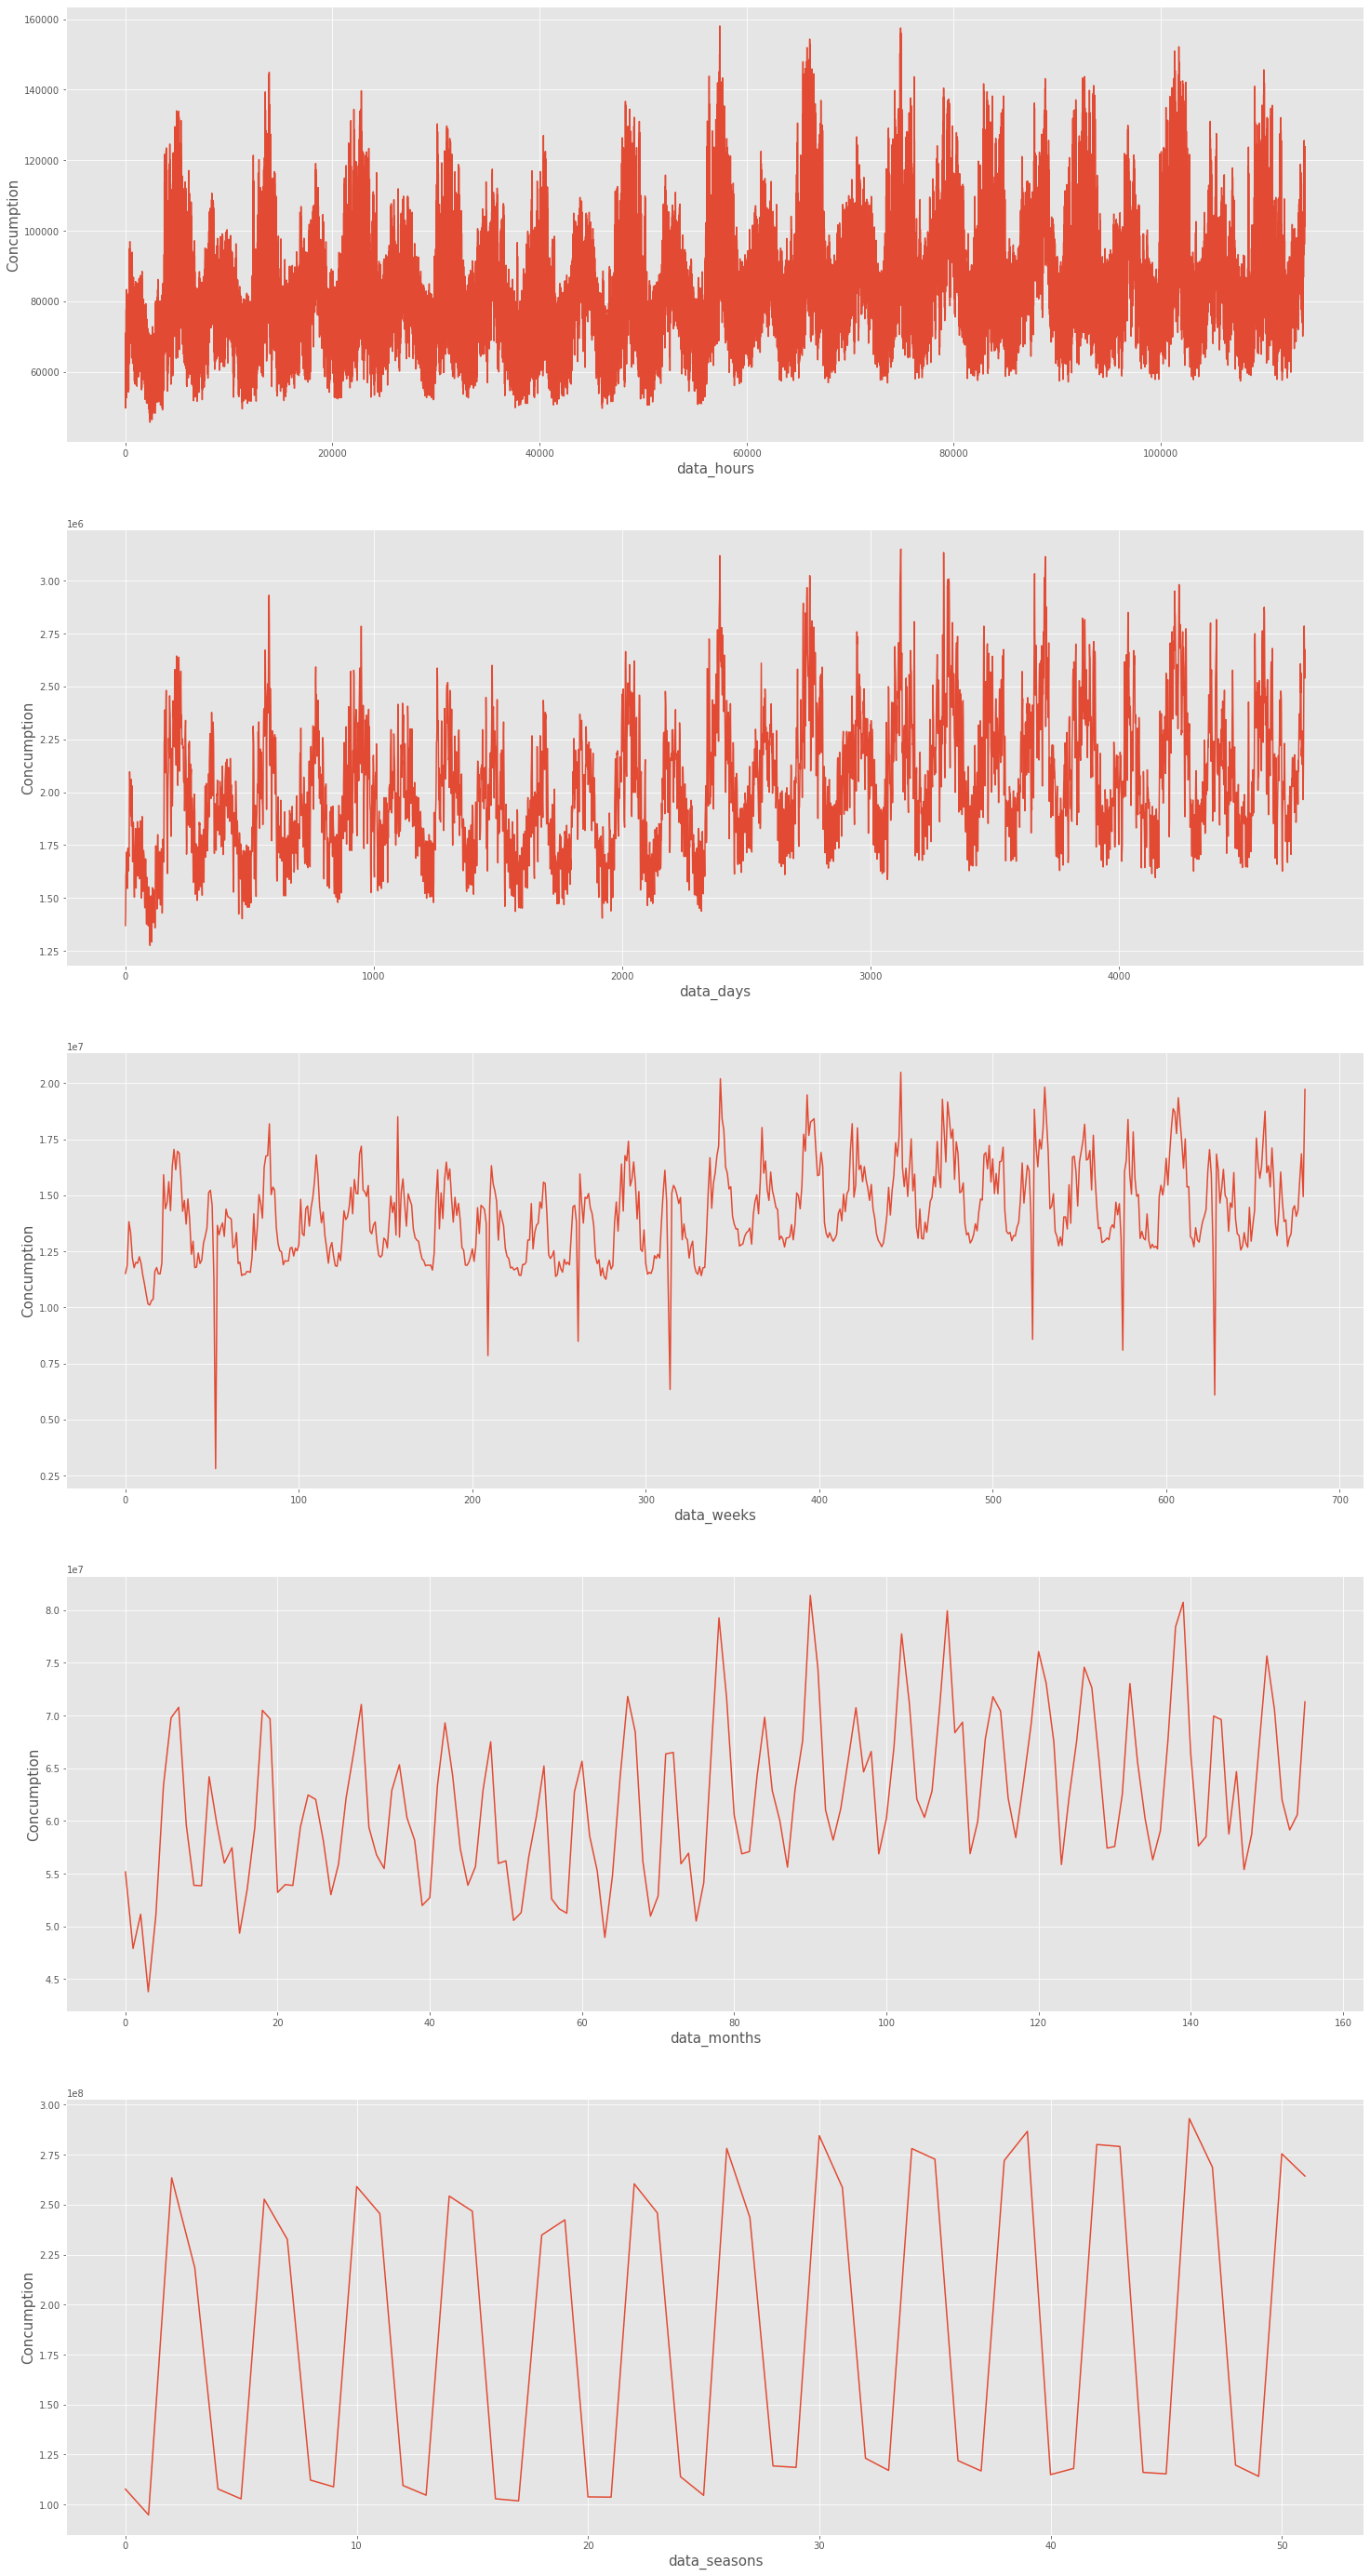

In [15]:
plt.figure(figsize = [25, 50])
for i in range(0,len(gran)):
    plt.subplot(len(gran),1,i+1)
    plt.plot(gran[i].values)
    plt.xlabel(label[i], fontsize=15)
    plt.ylabel('Concumption', fontsize=15)

## Lag plot and autocorrelation

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

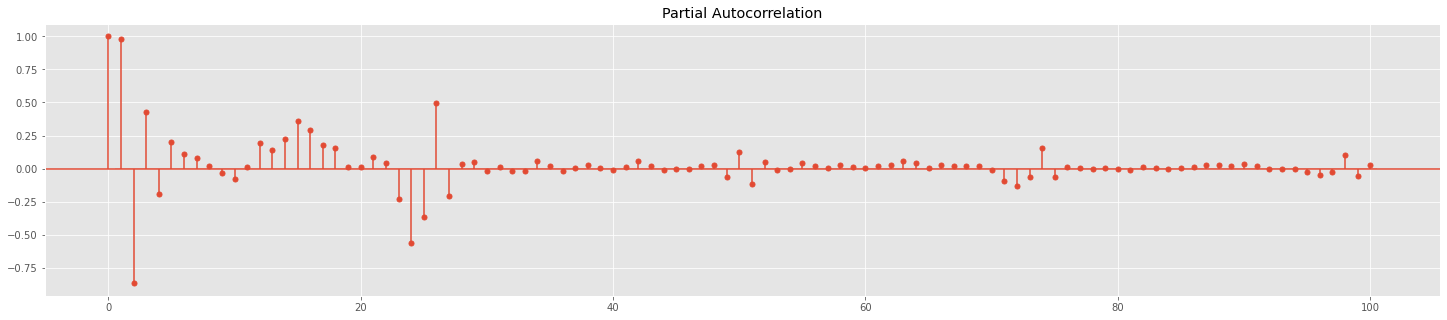

In [17]:
fig, axe = plt.subplots(figsize=(25,5))
_ = plot_acf(data_hours, ax=axe, lags=1000)
fig1, axe1 = plt.subplots(figsize=(25,5))
plot_pacf(data_hours, ax=axe1, lags=100);

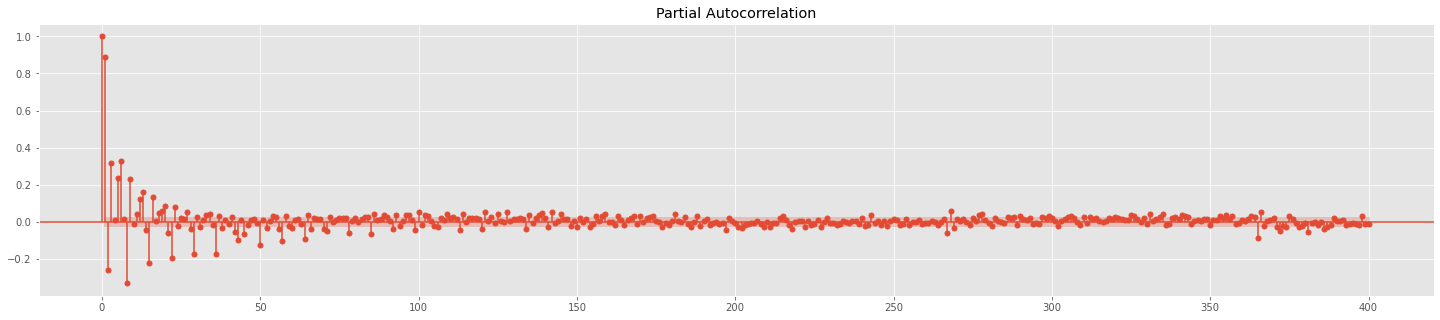

In [18]:
fig, axe = plt.subplots(figsize=(25,5))
_ = plot_acf(data_days, ax=axe, lags=400)
fig1, axe1 = plt.subplots(figsize=(25,5))
plot_pacf(data_days, ax=axe1, lags=400);

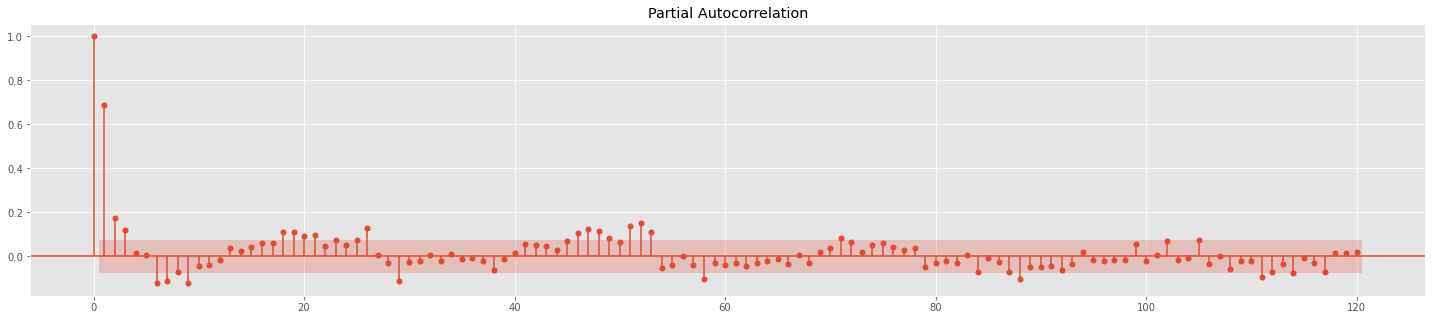

In [19]:
fig, axe = plt.subplots(figsize=(25,5))
_ = plot_acf(data_weeks, ax=axe, lags=120)
fig1, axe1 = plt.subplots(figsize=(25,5))
plot_pacf(data_weeks, ax=axe1, lags=120);

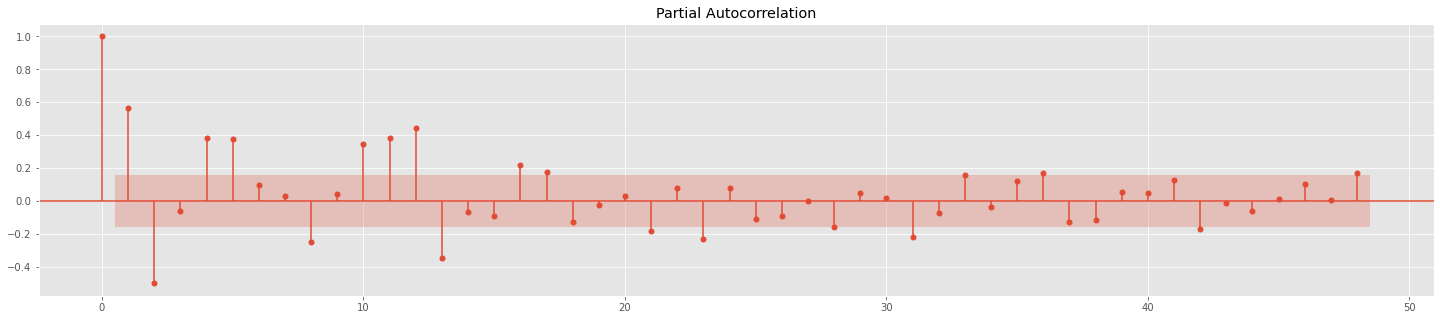

In [20]:
fig, axe = plt.subplots(figsize=(25,5))
_ = plot_acf(data_months, ax=axe, lags=48)
fig1, axe1 = plt.subplots(figsize=(25,5))
plot_pacf(data_months, ax=axe1, lags=48);

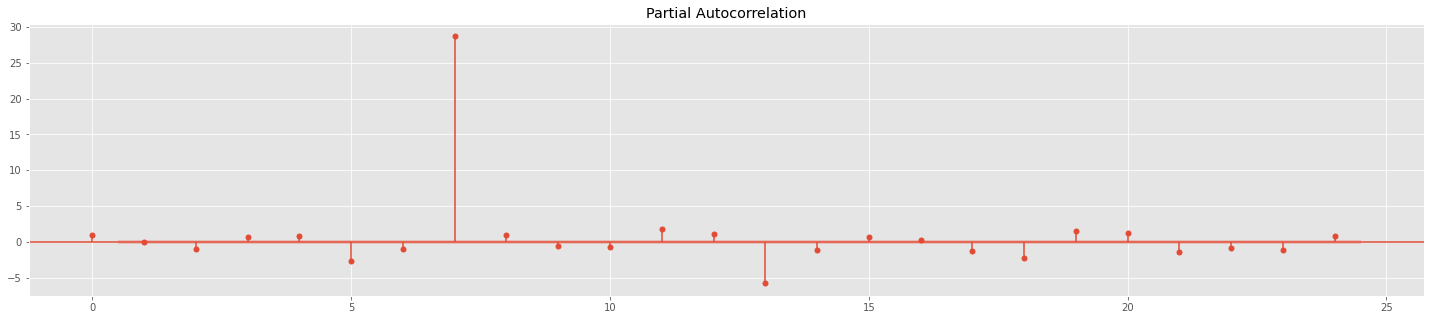

In [21]:
fig, axe = plt.subplots(figsize=(25,5))
_ = plot_acf(data_seasons, ax=axe, lags=24)
fig1, axe1 = plt.subplots(figsize=(25,5))
plot_pacf(data_seasons, ax=axe1, lags=24);

## Lag_plots

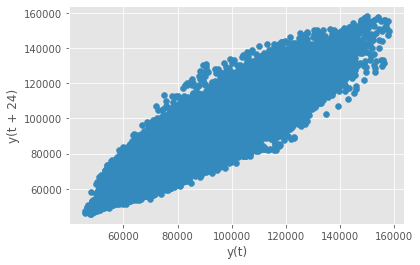

In [22]:
lag_plot(data_hours,lag=24)

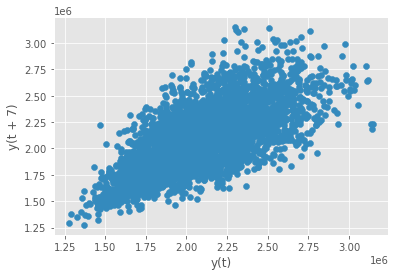

In [23]:
lag_plot(data_days,lag=7)

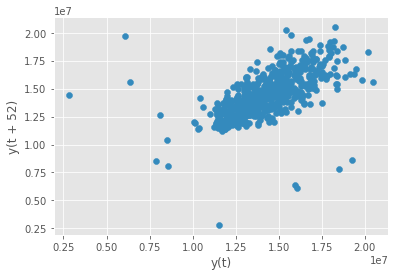

In [24]:
lag_plot(data_weeks,lag=52)

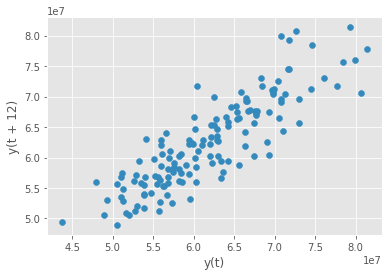

In [25]:
lag_plot(data_months,lag=12)

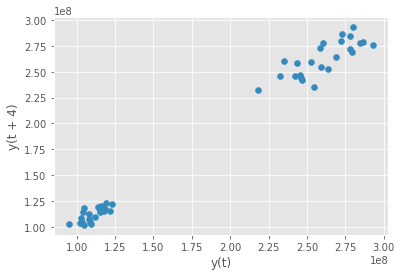

In [26]:
lag_plot(data_seasons,lag=4)

## Arima

In [27]:
len(data_days)

4748

In [28]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
def arima_imp(data_model,p,d,q,P=0,D=0,Q=0,m=0):
    train_set, test_set = data_model[:(round(len(data_model)*0.75))], data_model[(round(len(data_model)*0.75)):len(data_model)]
    model = ARIMA(train_set, order=(p,d,q), seasonal_order=(P,D,Q,m), enforce_stationarity=True)
    model_fit = model.fit()
    print(model_fit.summary())
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot()
    residuals.plot(kind='kde')
    print(residuals.describe())
    plt.show()
    print(type(train_set))
    return model_fit,train_set,test_set

(3561,) (1187,)
                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                 3561
Model:                 ARIMA(7, 1, 0)   Log Likelihood              -46182.546
Date:                Thu, 04 Mar 2021   AIC                          92381.092
Time:                        18:23:49   BIC                          92430.496
Sample:                    01-01-2005   HQIC                         92398.710
                         - 10-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1224      0.014      8.466      0.000       0.094       0.151
ar.L2         -0.3574      0.015    -23.227      0.000      -0.388      -0.327
ar.L3         -0.1018      0.015    

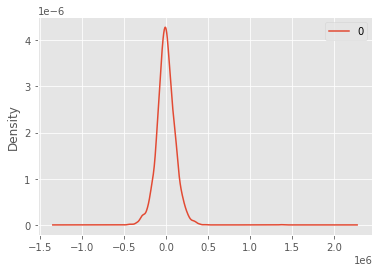

In [176]:
m_fit, train, test = arima_imp(data_days,7,1,0,0,0,0,0)
print(train, test)

In [177]:
yhat = m_fit.predict(start=len(train),end=len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
print(yhat.shape, train.shape, test.shape)
df =pd.DataFrame({'train':train,'test':test,'yhat':yhat})
#print('Test RMSE: %.3f' % rmse)

(1187,) (3561,) (1187,)


In [178]:
rmse

349732.2604450665

## Optimisation ARIMA avec test KPSS

In [181]:
from pmdarima.arima import auto_arima

model = auto_arima(train, start_p=0, start_q=0,
                      test='kpss',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      max_d=2,
                      m=7,           
                      start_P=0,
                      start_Q=0,  
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      n_jobs=-1)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=94440.284, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=93289.290, Time=0.48 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=93524.782, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=94438.289, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=94308.338, Time=0.18 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=92967.472, Time=0.87 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=93155.150, Time=0.64 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=92569.614, Time=1.31 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=92896.873, Time=0.67 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=3.44 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(3,1,0)(2,0,0)[7] intercept   : AIC=92558.086, Time=1.55 sec
 ARIMA(3,1,0)(1,0,0)[7] intercept   : AIC=9

## Optimisation ARIMA avec test AFD

In [180]:
from pmdarima.arima import auto_arima

model = auto_arima(train, start_p=0, start_q=0, 
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      max_d=2,
                      m=7,          
                      start_P=0,
                      start_Q=0,  
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      n_jobs=-1)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=99759.800, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=93246.106, Time=1.64 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=96896.908, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=113529.704, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=94264.364, Time=0.15 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=93030.291, Time=4.49 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=93019.068, Time=4.01 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=93207.227, Time=2.10 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=6.68 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=93096.906, Time=4.51 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=98084.756, Time=7.92 sec
 ARIMA(2,0,0)(2,0,1)[7] intercept   : AIC=92631.582, Time=6.67 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=92840.037, Time=3.06 sec
 ARIMA(2,0,0)(2,0,0)[7] intercept   : AIC=92686.371, Time=13.63 sec
 ARIMA(2,0,0)(2,0,2)[7]

## Forecast sur 356 jours avec le modèle ARIMA (7,0,5)

In [217]:
train, test = data_days[:(round(len(data_days)*0.75))], data_days[(round(len(data_days)*0.75)):len(data_days)]
from joblib import Parallel, delayed
import multiprocessing
inputs = range(356) 
def processInput(i):
    # predict
    #model = ARIMA(history, order=(52,1,4))
    donnee = data_days[0:(len(train)+i)]
    model = ARIMA(donnee, order=(7,0,5), seasonal_order=(0,0,0,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()
    yhat= yhat[0]
    obs = test[i]
    return obs, yhat

num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores,verbose = 100)(delayed(processInput)(i) for i in inputs)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   17.7s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   34.3s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:   34.4s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:   36.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:   36.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:   50.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   50.9s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   51.2s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:   53.4s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:  1.2min
[Parallel(

In [218]:
df = pd.DataFrame(results)
rmse = sqrt(mean_squared_error(df[0], df[1]))
print(rmse)

115737.63455853192


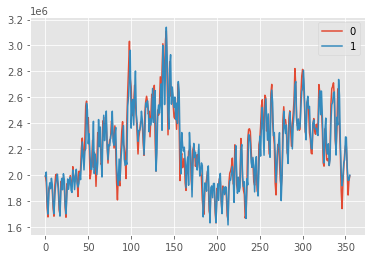

In [219]:
df.plot()

## Forecast sur 356 jours avec le modèle SARIMA (5,1,2,2,0,0,7)

In [223]:
train, test = data_days[:(round(len(data_days)*0.75))], data_days[(round(len(data_days)*0.75)):len(data_days)]
from joblib import Parallel, delayed
import multiprocessing
inputs = range(10) 
def processInput(i):
    # predict
    #model = ARIMA(history, order=(52,1,4))
    donnee = data_days[0:(len(train)+i)]
    model = ARIMA(donnee, order=(5,1,2), seasonal_order=(2,0,0,7))
    model_fit = model.fit()
    yhat = model_fit.forecast()
    yhat= yhat[0]
    obs = test[i]
    return obs, yhat

num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores,verbose = 100)(delayed(processInput)(i) for i in inputs)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   13.4s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   20.5s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:   21.1s remaining:   31.7s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   26.4s remaining:   26.4s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:   28.2s remaining:   18.8s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   33.1s remaining:   14.2s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:   33.4s remaining:    8.3s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   37.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   37.4s finished


In [ ]:
df = pd.DataFrame(results)
rmse = sqrt(mean_squared_error(df[0], df[1]))
print(rmse)

In [ ]:
df.plot()

In [62]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
# display first few rows
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()

FileNotFoundError: FileNotFoundError: [Errno 2] No such file or directory: 'daily-minimum-temperatures.csv'

In [63]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf